# Classification tree



A classification tree, also known as a decision tree for classification, is a supervised machine learning model used for solving classification problems. Classification problems involve predicting discrete class labels for input data points based on their feature attributes. Classification trees are a popular choice for modeling decision-making processes in which the goal is to classify data points into one of several predefined classes or categories. 



<img src="../dtClassification.png" width="618"/>

<h3>Here are the key characteristics and concepts related to classification trees:</h3>



1. <h4>Decision Tree Structure: </h4>

A classification tree is a hierarchical structure consisting of nodes. It starts with a root node and branches into internal nodes, which in turn branch into leaf nodes (also known as terminal nodes).

2. <h4> Node Splitting: </h4>

At each internal node, the tree algorithm selects a feature and a splitting criterion to divide the data into two or more child nodes. The goal is to create splits that maximize the purity or homogeneity of the class labels within each node.

3. <h4>Leaf Nodes: </h4>

The leaf nodes are the terminal nodes of the tree. Each leaf node contains a predicted class label, representing the majority class of the training samples in that node.

4. <h4>Predictive Modeling: </h4>

To make predictions for new data, you traverse the tree from the root to a leaf node based on the feature values of the new data point. The class label in the selected leaf node is the predicted class for that data point.

5. <h4>Recursive Partitioning: </h4>

The process of building a classification tree is recursive. The algorithm starts with the entire dataset and recursively splits it into subsets by choosing the best feature and split criterion at each node, continuing until a stopping condition is met.

6. <h4>Stopping Criteria: </h4>

Stopping criteria are used to determine when to stop growing the tree. Common stopping criteria include limiting the tree depth, setting a minimum number of samples per leaf, or using a minimum impurity reduction threshold.

7. <h4>Impurity Measures: </h4>

In classification trees, impurity measures such as Gini impurity, entropy, or misclassification rate are used to evaluate how well a split increases the purity or homogeneity of class labels. The split that minimizes impurity is selected.

8. <h4>Pruning: </h4>

After building a classification tree, it may be pruned to reduce overfitting. Pruning involves removing nodes that do not significantly improve the tree's performance on a validation dataset.

9. <h4>Visualization: </h4>

Classification trees can be visualized graphically, making it easy to interpret and understand the model's decision-making process.

10. <h4>Ensemble Methods: </h4>

Classification trees are often used as building blocks in ensemble methods like Random Forests and Gradient Boosting, which combine multiple trees to improve predictive accuracy and reduce overfitting.

11. <h4>Advantages: </h4>

Classification trees are interpretable, and their decision-making process is easy to understand. They can capture complex decision boundaries and interactions between features.

12. <h4>Limitations: </h4>

They can be prone to overfitting, especially if the tree is allowed to grow deep. Single trees may not generalize well on certain types of data. Ensembling methods can mitigate these limitations.

Classification trees are widely used in various domains, including healthcare, finance, and natural language processing, for tasks such as spam email detection, disease diagnosis, and sentiment analysis. Proper tuning of hyperparameters and consideration of potential overfitting are essential when working with classification trees.

##### Python implementation


DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples:

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
# After being fitted, the model can then be used to predict the class of samples:
clf.predict([[2., 2.]])

array([1])

In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes.

As an alternative to outputting a specific class, the probability of each class can be predicted, which is the fraction of training samples of the class in a leaf:

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

Using the Iris dataset, we can construct a tree as follows:

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

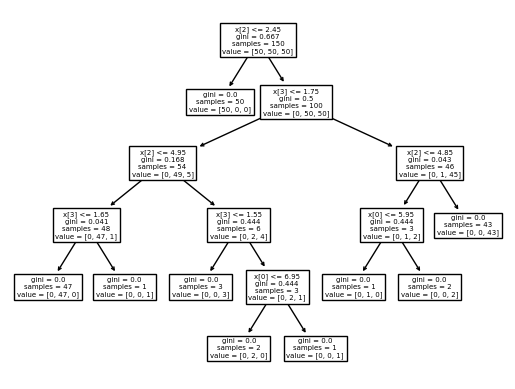

In [5]:
# Once trained, you can plot the tree with the plot_tree function:
tree.plot_tree(clf)